In [1]:
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta

In [2]:
expensive_sensor_interval = timedelta(hours=1)
expensive_sensor_accuracy = 0.1  # Assuming accuracy within 0.1 units
inexpensive_sensor_interval = timedelta(minutes=1)
inexpensive_sensor_accuracy = 1.0  # Assuming accuracy within 1.0 units

expensive_sensor_count = 10
inexpensive_sensor_count = 90

In [3]:
start_time = datetime(2023, 1, 1)  # Specify the start time
end_time = datetime(2023, 1, 31)  # Specify the end time

timestamps = pd.date_range(start=start_time, end=end_time, freq=inexpensive_sensor_interval)

In [4]:
expensive_sensor_data = [[] for i in range(expensive_sensor_count)]
inexpensive_sensor_data = [[] for i in range(inexpensive_sensor_count)]
temp = np.linspace(75.0,85.0, len(timestamps))
counter = 0

for timestamp in timestamps:
    # Expensive sensor data
    if timestamp.minute == 0:  # Only take measurements every hour
        for i in range(expensive_sensor_count):
            expensive_measurement = temp[counter] + random.uniform(-5.0, 5.0)  # Assuming a temperature range between 25.0 and 30.0 units
            expensive_sensor_data[i].append(expensive_measurement)


    # Inexpensive sensor data
    for i in range(inexpensive_sensor_count):
        inexpensive_measurement = temp[counter] + random.uniform(-10.0, 10.0)  # Assuming a temperature range between 20.0 and 35.0 units
        inexpensive_measurement += random.uniform(-inexpensive_sensor_accuracy, inexpensive_sensor_accuracy)
        inexpensive_sensor_data[i].append(inexpensive_measurement)

    counter += 1
    


In [6]:
sensor_data = np.concatenate((np.array(expensive_sensor_data).flatten(), np.array(inexpensive_sensor_data).flatten()), axis=0)
sensor_data.shape

(3895300,)

In [7]:
sensor_names = np.array([])
for i in range (expensive_sensor_count + inexpensive_sensor_count):
    name = 'sensor_' + str(i)
    if i < expensive_sensor_count:
        sensor_names = np.append(sensor_names, ([name] * len(expensive_sensor_data[0])))
    else:
        sensor_names = np.append(sensor_names, ([name] * len(inexpensive_sensor_data[0])))

In [8]:
# Define the range for latitude and longitude
min_latitude = 40.0  # Minimum latitude value
max_latitude = 42.0  # Maximum latitude value
min_longitude = -75.0  # Minimum longitude value
max_longitude = -73.0  # Maximum longitude value

sensor_lat = np.array([])
sensor_long = np.array([])

for i in range(expensive_sensor_count + inexpensive_sensor_count):
    lat = random.uniform(min_latitude, max_latitude)
    long = random.uniform(min_longitude, max_longitude)

    if i < expensive_sensor_count:
        sensor_lat = np.append(sensor_lat, [lat] * len(expensive_sensor_data[0]))
        sensor_long = np.append(sensor_long, [long] * len(expensive_sensor_data[0]))
    else:
        sensor_lat = np.append(sensor_lat, [lat] * len(inexpensive_sensor_data[0]))
        sensor_long = np.append(sensor_long, [long] * len(inexpensive_sensor_data[0]))

In [9]:
data = list(zip(sensor_names, sensor_data, sensor_lat, sensor_long))
df = pd.DataFrame(data, columns=['Sensor','Temperature', 'Latitude', 'Longitude'])

In [32]:
expensive_indexes = ['sensor_' + str(i) for i in range(expensive_sensor_count)]
inexpensive_indexes = ['sensor_' + str(i) for i in range(expensive_sensor_count, expensive_sensor_count + inexpensive_sensor_count)]

df['Type'] = np.where(df['Sensor'].isin(expensive_indexes), '0', '1')

In [39]:
types = [0 for i in range(expensive_sensor_count)] + [1 for i in range(inexpensive_sensor_count)]
loc = list(zip(df['Latitude'].unique(), df['Longitude'].unique(), types))

In [44]:
df_array = [ df[df["Sensor"] == 'sensor_' + str(i)] for i in range(expensive_sensor_count + inexpensive_sensor_count)]

In [ ]:
pd.to_pickle(df_array, 'data.pkl')

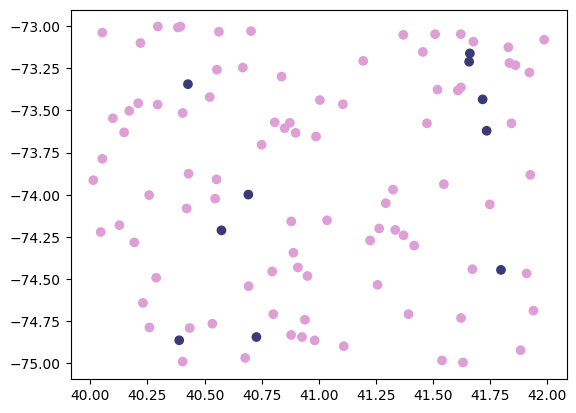

In [42]:
import matplotlib.pyplot as plt

x,y,colors = zip(*loc)

plt.scatter(x,y,c=colors, cmap="tab20b")
plt.show()